In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [2]:
# download the checkpoint demo
!mim download mmdet --config rtmdet_l_8xb32-300e_coco --dest ./checkpoints
config_file = './checkpoints/rtmdet_l_8xb32-300e_coco.py'
checkpoint_file = './checkpoints/rtmdet_l_8xb32-300e_coco_20220719_112030-5a0be7c4.pth'

processing rtmdet_l_8xb32-300e_coco...
downloading --------------------------------------- 0.0/432.7 MiB ? eta -:--:--
downloading -------------------------------- 0.2/432.7 MiB 6.3 MB/s eta 0:01:12
downloading -------------------------------- 0.5/432.7 MiB 5.6 MB/s eta 0:01:21
downloading -------------------------------- 1.2/432.7 MiB 9.4 MB/s eta 0:00:49
downloading ------------------------------- 1.7/432.7 MiB 16.5 MB/s eta 0:00:28
downloading ------------------------------- 2.5/432.7 MiB 16.5 MB/s eta 0:00:28
downloading ------------------------------- 3.0/432.7 MiB 16.2 MB/s eta 0:00:28
downloading ------------------------------- 3.8/432.7 MiB 13.1 MB/s eta 0:00:35
downloading ------------------------------- 4.2/432.7 MiB 13.1 MB/s eta 0:00:35
downloading ------------------------------- 4.9/432.7 MiB 13.1 MB/s eta 0:00:35
downloading ------------------------------- 5.6/432.7 MiB 16.2 MB/s eta 0:00:28
downloading ------------------------------- 6.4/432.7 MiB 16.5 MB/s eta 0:00:28
d

In [4]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_l_8xb32-300e_coco_20220719_112030-5a0be7c4.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [5]:
# test a single image
img = mmcv.imread( 'demo.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)

d:\anaconda3\envs\mmdet\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<DetDataSample(

    META INFORMATION
    batch_input_shape: (640, 640)
    img_shape: (640, 640)
    img_path: None
    scale_factor: (1.0, 1.0)
    pad_shape: (640, 640)
    img_id: 0
    ori_shape: (427, 640)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2, 56,  2,  2,  2,  2, 13,  2,  2,  7,  2,
                         2,  7,  7,  2,  7,  2,  7,  2,  2,  2,  2,  7, 56,  2,  2,  2,  7, 13,
                         7, 13,  7,  2,  0,  7,  2,  2, 56,  7,  7,  9, 13,  2,  2,  2,  7,  7,
                         2,  7,  7,  2,  0,  2,  0,  7, 60,  2, 13,  5,  5,  2,  2,  0,  2, 13,
                         2,  2,  7,  2, 56,  2,  7, 13,  7, 13,  2,  2,  2,  2,  7, 13,  2,  2,
                        56,  5,  2,  2,  2,  2,  2,  2, 17,  2, 13,  7,  2,  2,  2,  2,  7,  7,
                        56,  0,  7,  0,  2, 13,  2,  7,  0,  0,  2, 13,  7,  3,  2,  

In [6]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

d:\anaconda3\envs\mmdet\lib\site-packages\mmengine\visualization\visualizer.py:163: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


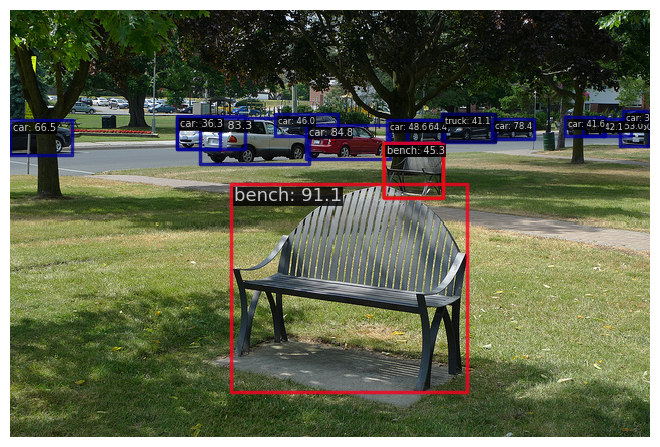

In [7]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()